Will use pycaret for my modeling this time. PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. I wanted to spend more time on eda and cleaning the data, so this frees up a lot of my time to do so.

Workflow for this notebook are as follows:
    
    1. Read in data
    2. Drop unnecessary columns
    3. Look at correlations and drop those with inverse to the target 
    4. Model using pycaret
    5. Compare models
    6. Visualize the best model
    7. Make predictions
    

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pycaret as pc

In [84]:
model_df = pd.read_csv('../data/model_df.csv')
model_df.drop(columns = ['id','pid'], inplace =True)
model_df.head()

,ms_subclass,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,lot_frontage,lot_area,street_Pave,...,yr_sold,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,saleprice
0,60,0.0,0.0,0.0,0.0,1.0,0.0,69.0,13517,1.0,...,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,130500
1,60,0.0,0.0,0.0,0.0,1.0,0.0,43.0,11492,1.0,...,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,220000
2,20,0.0,0.0,0.0,0.0,1.0,0.0,68.0,7922,1.0,...,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,109000
3,60,0.0,0.0,0.0,0.0,1.0,0.0,73.0,9802,1.0,...,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,174000
4,50,0.0,0.0,0.0,0.0,1.0,0.0,82.0,14235,1.0,...,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,138500


In [85]:
model_df.shape

(2051, 257)

In [86]:
#Looking at correlations for all columns and creating variable for future drop
drops = (model_df.corr()[['saleprice']].sort_values(by='saleprice', ascending = False))
drops.reset_index(inplace=True)
drops

,index,saleprice
0,saleprice,1.000000
1,overall_qual,0.800207
2,gr_liv_area,0.697038
3,garage_area,0.649897
4,garage_cars,0.647781
...,...,...
252,garage_qual_Unf,-0.432220
253,bsmt_qual_TA,-0.456979
254,fireplace_qu_No,-0.485858
255,kitchen_qual_TA,-0.540860


In [87]:
#getting rid of the colums with inverse correlations
delete = drops[drops['saleprice']<0]
delete['index']
model_df.drop(columns = delete['index'], inplace=True)

In [88]:
model_df.head()

,ms_zoning_FV,ms_zoning_RL,lot_frontage,lot_area,street_Pave,alley_None,lot_shape_IR2,lot_shape_IR3,land_contour_HLS,land_contour_Low,...,pool_qc_Gd,fence_No,misc_feature_No,misc_feature_TenC,mo_sold,sale_type_CWD,sale_type_Con,sale_type_ConLI,sale_type_New,saleprice
0,0.0,1.0,69.0,13517,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3,0.0,0.0,0.0,0.0,130500
1,0.0,1.0,43.0,11492,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,4,0.0,0.0,0.0,0.0,220000
2,0.0,1.0,68.0,7922,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,0.0,109000
3,0.0,1.0,73.0,9802,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,4,0.0,0.0,0.0,0.0,174000
4,0.0,1.0,82.0,14235,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3,0.0,0.0,0.0,0.0,138500


In [89]:
model_df.shape

(2051, 116)

In [78]:
from pycaret.regression import *
setup(model_df, target = 'saleprice', session_id = 123, train_size=.75)

,Description,Value
0,Session id,123
1,Target,saleprice
2,Target type,Regression
3,Original data shape,"(2051, 116)"
4,Transformed data shape,"(2051, 116)"
5,Transformed train set shape,"(1538, 116)"
6,Transformed test set shape,"(513, 116)"
7,Numeric features,115
8,Preprocess,True
9,Imputation type,simple


In [79]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16533.5860,718431739.2249,26204.0292,0.8935,0.1473,0.1027,0.7600
et,Extra Trees Regressor,16654.1966,727104145.7801,26462.1285,0.8922,0.1487,0.1033,0.5560
lightgbm,Light Gradient Boosting Machine,16456.0784,737211601.0543,26573.3524,0.8885,0.1449,0.0997,1.2910
rf,Random Forest Regressor,17373.6674,831810085.6162,28365.3893,0.8747,0.1543,0.1065,0.5370
br,Bayesian Ridge,18654.0209,941070035.8466,29228.2207,0.8654,0.1856,0.1142,0.4650
ridge,Ridge Regression,18911.1035,937696605.3311,29416.6176,0.8647,0.1791,0.1157,0.4510
llar,Lasso Least Angle Regression,19061.6497,952080236.7885,29722.7393,0.8623,0.1772,0.1162,0.5020
lasso,Lasso Regression,19240.5737,965393914.9334,29943.2629,0.8602,0.1809,0.1177,0.4520
lr,Linear Regression,19267.8312,969506813.1934,30010.8199,0.8596,0.1816,0.1178,2.1170
omp,Orthogonal Matching Pursuit,21811.3790,1108405515.4225,32483.9550,0.8380,0.1799,0.1305,0.4530


After playing around with hyperparameters of pycaret.regressor, Gradient Boost turned out to be the best model for prediction. The metrics that I chose were R^2 and RMSE. In this particular problem, a higher r^2 is preferably since we are making predictions. I chose RMSE as the second metric because its more easy to interpret especially when explaining to non-technical persons. Next, I will use the built in plot functions to visualize the best model using the residuals, top 10 feature importances, and prediction error. 

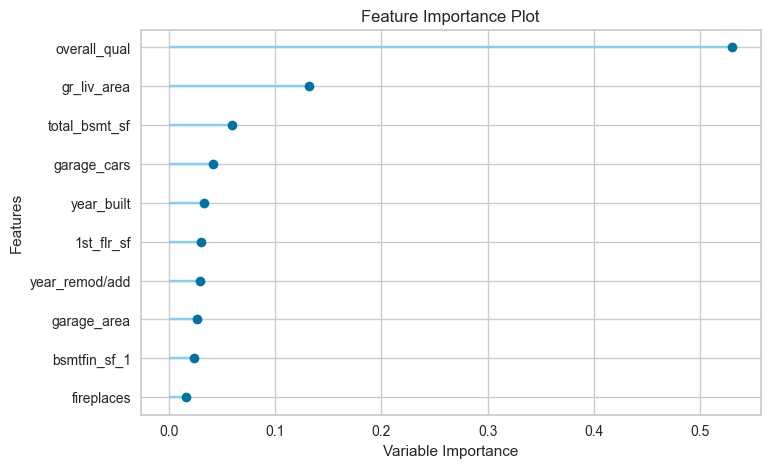

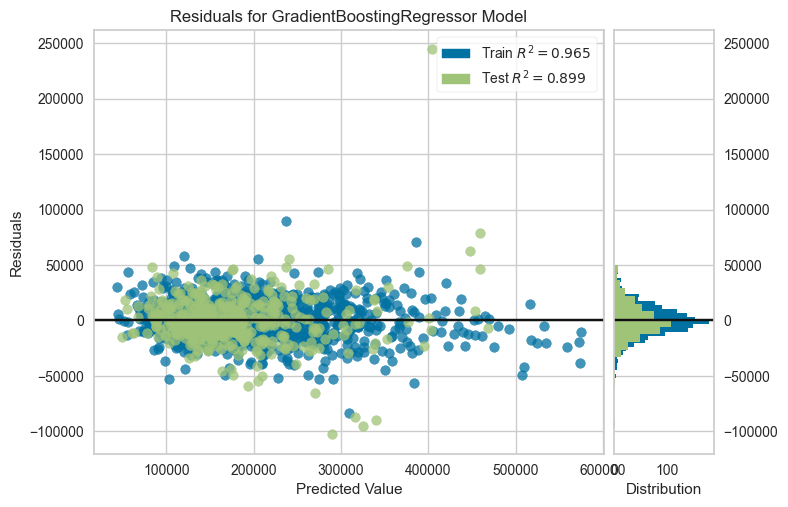

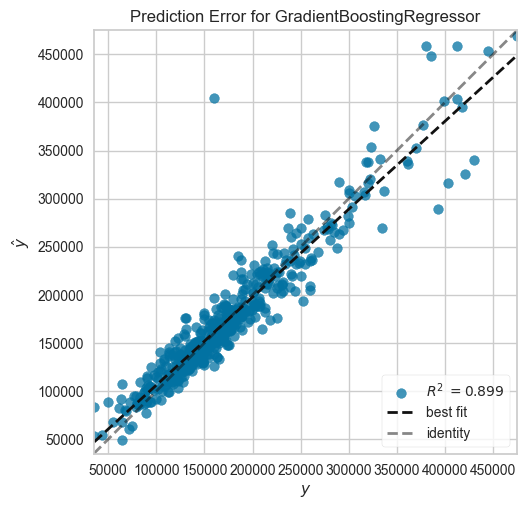

In [80]:
plot_model(best, plot = 'feature')
plot_model(best, plot = 'residuals')
plot_model(best, plot = 'error')

In [68]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,14178.9096,540170483.3507,23241.5680,0.8912,0.1289,0.0902


,ms_zoning_FV,ms_zoning_RL,lot_frontage,lot_area,street_Pave,alley_None,lot_shape_IR2,lot_shape_IR3,land_contour_HLS,land_contour_Low,...,fence_No,misc_feature_No,misc_feature_TenC,mo_sold,sale_type_CWD,sale_type_Con,sale_type_ConLI,sale_type_New,saleprice,prediction_label
433,0.0,1.0,64.0,12102,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,4,0.0,0.0,0.0,0.0,165000,133194.899043
1303,0.0,1.0,69.0,19522,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2,0.0,0.0,0.0,0.0,300000,260650.188440
1906,0.0,1.0,65.0,6285,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,4,0.0,0.0,0.0,0.0,133500,142682.343134
1467,0.0,1.0,102.0,11660,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,7,0.0,0.0,0.0,1.0,174190,174055.841492
668,0.0,1.0,69.0,9205,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,6,0.0,0.0,0.0,0.0,290000,241150.726392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,0.0,1.0,60.0,7200,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,8,0.0,0.0,0.0,0.0,156500,155806.685720
270,0.0,1.0,112.0,16451,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,7,0.0,0.0,0.0,0.0,370000,366994.043439
546,0.0,1.0,75.0,10050,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,8,0.0,0.0,0.0,0.0,129500,129049.964956
1353,0.0,1.0,74.0,11988,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,8,0.0,0.0,0.0,0.0,188700,173753.763357


After viewing these above charts and predictions, I see that my model has a slight overfit (see residuals graph) and might not perform as well on new data. It is however close better than previous models I have used on other iterations of the same project. Moving forward, I would tune some of the hyperparameters a bit more and decrease the training size to see if that helps. Also, the data set is small and is more of a teaching tool. If I had a dataset that had more than 30,000 rows the model might perform better.
Regardless, this is a good lesson in using regression to predict housing prices and for now I am satisfied with the results.

In [81]:
#Saving the model for later use
save_model(best, 'gradient_ames')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\13175\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ms_zoning_FV', 'ms_zoning_RL',
                                              'lot_frontage', 'lot_area',
                                              'street_Pave', 'alley_None',
                                              'lot_shape_IR2', 'lot_shape_IR3',
                                              'land_contour_HLS',
                                              'land_contour_Low',
                                              'lot_config_CulDSac',
                                              'lot_config_FR3', 'land_slope_Mod',
                                              'land_sl...
                                              'neighborhood_Timber',
                                              'neighborhood_Veenker',
                                              'condition_1_Norm',
                             